# Deep Learning Project
## Chest X-rays

Students:
- **Emanuele Conforti (252122)**
- **Jacopo Garofalo (252093)**
- **Gianmarco La Marca (252256)**


### Task

The objective of this project is to generate a descriptive report (a diagnosis) from images, which represent chest X-rays (frontal and lateral) and tags (called *MeSH* in the dataset), that are keywords.

### Dataset structure

All the data have been fetched from here: https://www.kaggle.com/datasets/raddar/chest-xrays-indiana-university


This dataset is formed by:
- *indiana_reports.csv*: dataset containing reports, MeSH (tags) and other fields
- *indiana_projections.csv*: dataset containing images filenames and type of images (frontal or lateral). Through the *uid* field we can link reports' entries to images (i.e., we can check what images are related to a specific report).


## Importing the dataset

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
! kaggle datasets download raddar/chest-xrays-indiana-university

Dataset URL: https://www.kaggle.com/datasets/raddar/chest-xrays-indiana-university
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 13.2G/13.2G [11:10<00:00, 23.3MB/s]
100% 13.2G/13.2G [11:10<00:00, 21.1MB/s]


In [3]:
import zipfile
import os

# Specifica il nome del file scaricato
file_name = "chest-xrays-indiana-university.zip"

# Estrai il file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall("chest_xrays_data")

In [4]:
!ls chest_xrays_data

images	indiana_projections.csv  indiana_reports.csv


## Data understanding

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

reports_df = pd.read_csv("chest_xrays_data/indiana_reports.csv")
reports_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [6]:
projections_df = pd.read_csv('chest_xrays_data/indiana_projections.csv')
projections_df.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [7]:
reports_df.shape, projections_df.shape

((3851, 8), (7466, 3))


UID:  1


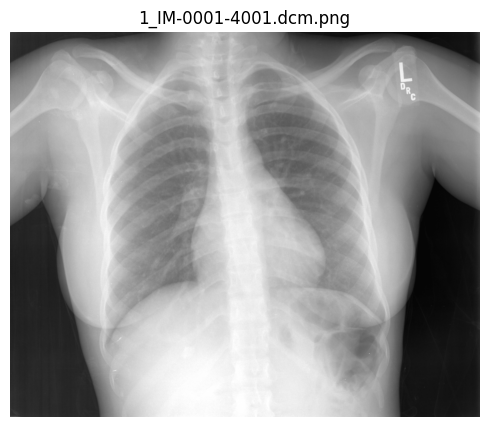

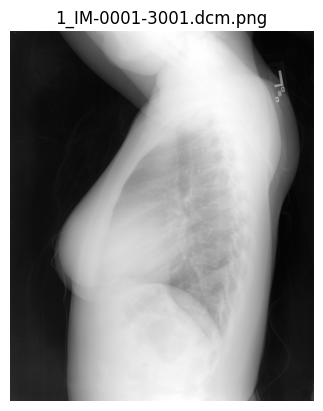

Findings: The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.

UID:  2


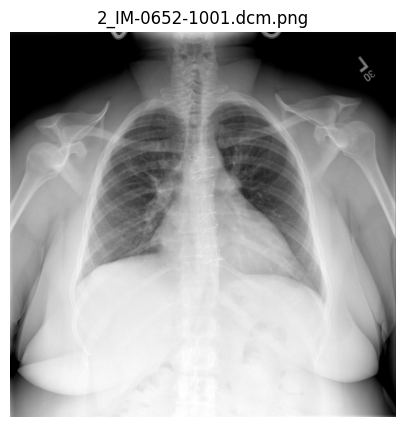

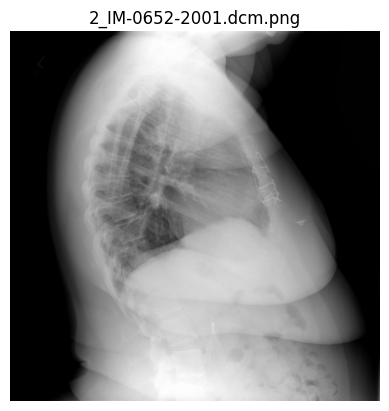

Findings: Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.

UID:  3


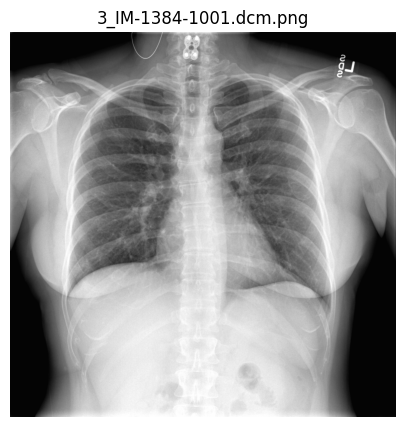

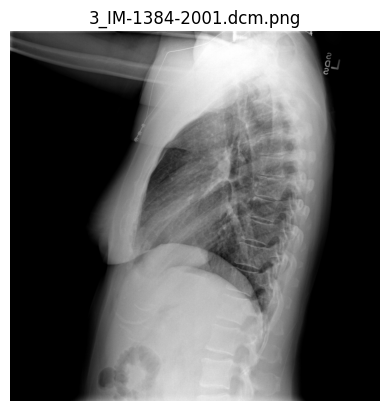

Findings: nan


In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img_base_dir = 'chest_xrays_data/images/images_normalized/'

def visualize_sample_data():
  for uid in range(1, 4):
    plt.figure(figsize=(10, 5))
    print("\nUID: ", uid)

    findings = list(reports_df[reports_df['uid'] == uid]['findings'])[0]
    images = projections_df[projections_df['uid'] == uid]['filename']

    for img in images:
      png_img = Image.open(os.path.join(img_base_dir, img))
      png_img = png_img.convert('RGB')
      plt.title(img)
      plt.imshow(png_img)
      plt.axis('off')
      plt.show()
    print("Findings:", findings)

visualize_sample_data()

##### **Null values in reports dataset**
From the table below, we can notice that the reports dataset has some null values on *indication*, *comparison*, *findings* and *impression* fields

In [9]:
reports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851 entries, 0 to 3850
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         3851 non-null   int64 
 1   MeSH        3851 non-null   object
 2   Problems    3851 non-null   object
 3   image       3851 non-null   object
 4   indication  3765 non-null   object
 5   comparison  2685 non-null   object
 6   findings    3337 non-null   object
 7   impression  3820 non-null   object
dtypes: int64(1), object(7)
memory usage: 240.8+ KB


###### **Null values count**

In [10]:
reports_df.isna().sum()

,0
uid,0
MeSH,0
Problems,0
image,0
indication,86
comparison,1166
findings,514
impression,31


###### **Null values in projections dataset**

From the table below, see that there are no null values in the projections dataset

In [11]:
projections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7466 entries, 0 to 7465
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         7466 non-null   int64 
 1   filename    7466 non-null   object
 2   projection  7466 non-null   object
dtypes: int64(1), object(2)
memory usage: 175.1+ KB


## Building the images dataset

- We edit the images filenames truncating the *.dcm* extension
- We build the images dataset using Keras  

In [51]:
for filename in os.listdir(img_base_dir):
    if filename.endswith(".dcm.png"):
        new_filename = filename.replace(".dcm.png", ".png")
        os.rename(os.path.join(img_base_dir, filename), os.path.join(img_base_dir, new_filename))


In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
batch_size = 50
img_height = 244
img_width = 244


train_ds = tf.keras.utils.image_dataset_from_directory(
  img_base_dir,
  validation_split=0.2,
  subset="training",
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  ).map(lambda x: (x, x))

val_ds = tf.keras.utils.image_dataset_from_directory(
  img_base_dir,
  validation_split=0.2,
  subset="validation",
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  ).map(lambda x: (x, x))


Found 7470 files.
Using 5976 files for training.
Found 7470 files.
Using 1494 files for validation.


In [102]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(50, 244, 244, 3)
(50, 244, 244, 3)


## Encoding the images

- First, we need to encode the images into latent vectors in order to pass them to the Transformer. To do so, we can build an **encoder layer** exploiting **convolutions**.

In [86]:
# TODO: non funziona!
class ImageEncoder(layers.Layer):
  def __init__(self, latent_dim): #, latent_dim, shape):
    super().__init__()
    self.latent_dim = latent_dim
    # self.shape = shape
    self.input_layer = layers.Input(shape=(img_height, img_width, 1))
    self.conv1 = layers.Conv2D(16, 3, padding='same', activation='relu')
    self.max_pool = layers.MaxPooling2D()
    self.conv2 = layers.Conv2D(32, 3, padding='same', activation='relu')
    self.conv3 = layers.Conv2D(64, 3, padding='same', activation='relu')
    self.dropout = layers.Dropout(0.2)
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(latent_dim, activation='relu')
    self.dense2 = layers.Dense(2, activation='softmax')


  def call(self, x):
    #x = self.input_layer(x)
    x = self.conv1(x)
    x = self.max_pool(x)
    x = self.conv2(x)
    x = self.max_pool(x)
    x = self.conv3(x)
    x = self.max_pool(x)
    x = self.dropout(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x


# shape = x_test.shape[1:]
latent_dim = 64
encoder = ImageEncoder(latent_dim) # latent_dim, shape)
model = tf.keras.Sequential([
    encoder
])

In [104]:
# abbiamo provato ad implementare CNN senza functional API e classing per vedere se gli errori dipendevano dalle classi, ma abbiamo comunque errori in fase di training
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [105]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [106]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
EPOCHS = 25
history = model.fit(train_ds, epochs=EPOCHS)


Epoch 1/25


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 244, 244, 3), output.shape=(None, 2)